In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd
import numpy  as np

G  = nx.DiGraph()

pos = {}
node_label_pos = {}

with open('esnet6_proposed_footprint.txt') as f:
    reader = csv.DictReader(f , delimiter='\t')
            
    for row in reader :
        
        pos[row['SITE']]=(int(row['X']) , int(row['Y']))
        node_label_pos[row['SITE']] = (pos[row['SITE']][0] + 3 , pos[row['SITE']][1] + 3)

        G.add_node(row['SITE'] , SITE=row['SITE'],PE=float(row['PE']))

        total_bw = 0;
        if (row['LINK1'] is not None): 
            G.add_edges_from([ (row['SITE'] , row['LINK1']) , (row['LINK1'] , row['SITE']) ],
                       capacity=float(row['LINK1BW']) , 
                       impedance=1/(float(row['LINK1BW']))
                      )
            total_bw += float(row['LINK1BW'])

        if (row['LINK2'] is not None): 
            G.add_edges_from([ (row['SITE'] , row['LINK2']) , (row['LINK2'] , row['SITE']) ],
                       capacity=float(row['LINK2BW']) ,
                       impedance=1/(float(row['LINK2BW']))                       
                      )
            total_bw += float(row['LINK2BW'])
            
        if (row['LINK3'] is not None): 
            G.add_edges_from([ (row['SITE'] , row['LINK3']) , (row['LINK3'] , row['SITE']) ],
                       capacity=float(row['LINK3BW']) ,
                       impedance=1/(float(row['LINK3BW']))                       
                      ) 
            total_bw += float(row['LINK3BW'])
            
        if (row['LINK4'] is not None): 
            G.add_edges_from([ (row['SITE'] , row['LINK4']) , (row['LINK4'] , row['SITE']) ],
                       capacity=float(row['LINK4BW']) ,
                       impedance=1/(float(row['LINK4BW']))                       
                      )  
            total_bw += float(row['LINK4BW'])    
        
        G.node[row['SITE']]['bw'] = total_bw
        G.node[row['SITE']]['type'] = row['TYPE']


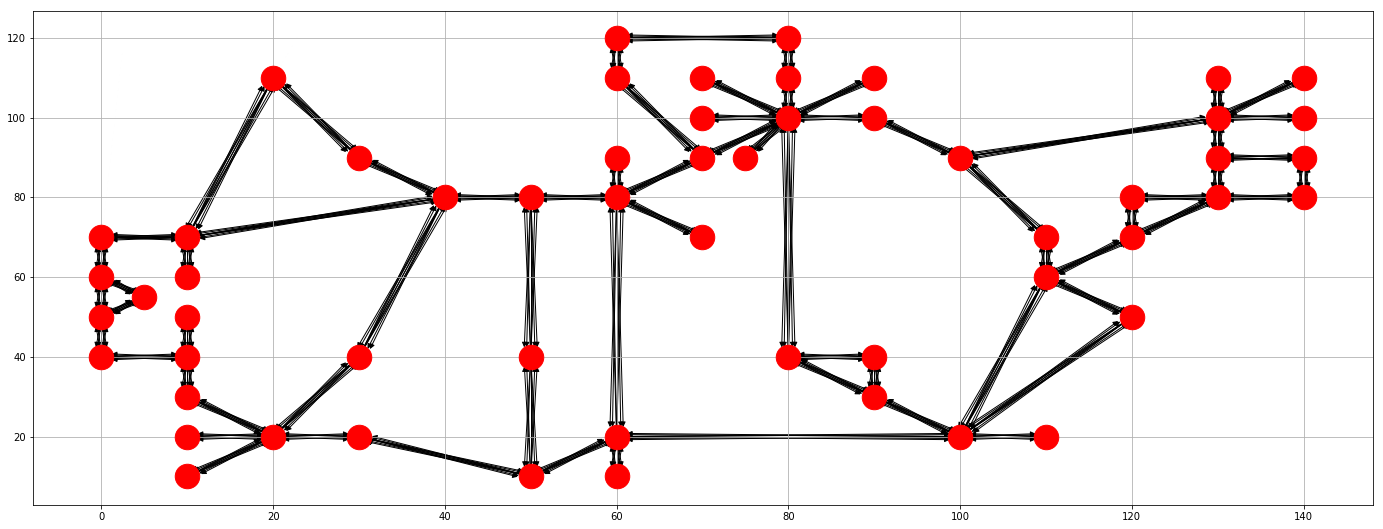

In [8]:



def highlightEdgeVector(G,position,edgelist=False,distance=[-0.5 , -0.25 , 0.25 , 0.5 ] , tail=0.2 , head = 0.2):
    
    import math
    from math import cos
    from math import sin
    from math import pi
    
    def rotate(p , theta) :
        x = p[0]
        y = p[1]
        x1 =  x*cos(theta) + y*sin(theta)
        y1 = -x*sin(theta) + y*cos(theta)
        return (x1,y1)
    
    for delta in distance :
        if (edgelist == False) : edgelist = G.edges()
        for edge in edgelist :
            s = edge[0]
            t = edge[1]
            
            spos = position[s]
            tpos = position[t]

            spost = (0,0)
            tpost = (tpos[0] - spos[0],tpos[1]-spos[1])
            
            theta = math.acos( abs(tpost[0] - spost[0]) / math.sqrt((tpost[0]-spost[0])**2 + (tpost[1]-spost[1])**2) )


            if ((tpost[0] > spost[0]) & (tpost[1] < spost[1]))   : sgn = -1 
            elif ((tpost[0] < spost[0]) & (tpost[1] > spost[1])) : sgn = -1 
            else : sgn = 1

            theta = theta * sgn

#            print ("theta is " , (360/(2*pi))*theta)
            
            srpos = rotate(spost,theta)
            trpos = rotate(tpost,theta)

            if (srpos[0] > trpos[0]) : sgn = -1
            else :                     sgn = 1

            srpos = (srpos[0] + sgn*abs(tail) , srpos[1] + delta)
            trpos = (trpos[0] - sgn*abs(head) , trpos[1] + delta)

            spos1 = rotate(srpos,-theta)
            tpos1 = rotate(trpos,-theta)
            
            new_pos={}
#            new_pos[s] = (spos1[0] + 0.5,spos1[1] + 0.5)
#            new_pos[t] = (tpos1[0] + 0.5,tpos1[1] + 0.5)
            new_pos[s] = spos
            new_pos[t] = (tpos1[0]+spos[0],tpos1[1]+spos[1])

#            print ("Started with " , spos , tpos)
#            print ("Translated to" , spost, tpost)
#            print ("Rotated to " , srpos , trpos )
#            print ("Ended With " , new_pos[s],new_pos[t])
#            print ("\n")
        
            nx.draw_networkx_edges(G,pos=new_pos , edgelist=[(s,t)] , width=1)   

fig = plt.figure(figsize=(24,20))
ax = plt.subplot(211)

nx.draw_networkx_nodes(G,pos,node_shape='o',node_size=600 , alpha = 1)
nx.draw_networkx_edges(G,pos , arrows=False)

for edge in G.edges() :
#    highlightEdgeVector(G,edgelist=[edge] , position=pos,distance = [i/2 for i in range(-3,4)] , tail=0.5 , head=0.1)
    highlightEdgeVector(G,pos,edgelist=[edge],distance = [-0.8 , -0.5 , 0.5 , 0.8] , tail=0.2 , head=0.2)

ax.grid(True)
plt.show()